In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import pandas as pd
import json
import seaborn as sns
import networkx as nx
from collections import defaultdict
from konlpy.tag import Okt

In [2]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
df = pd.read_excel("교과서 데이터 정리본 계층형.xlsx")

In [7]:
# 대단원별 본문 길이 분포 분석

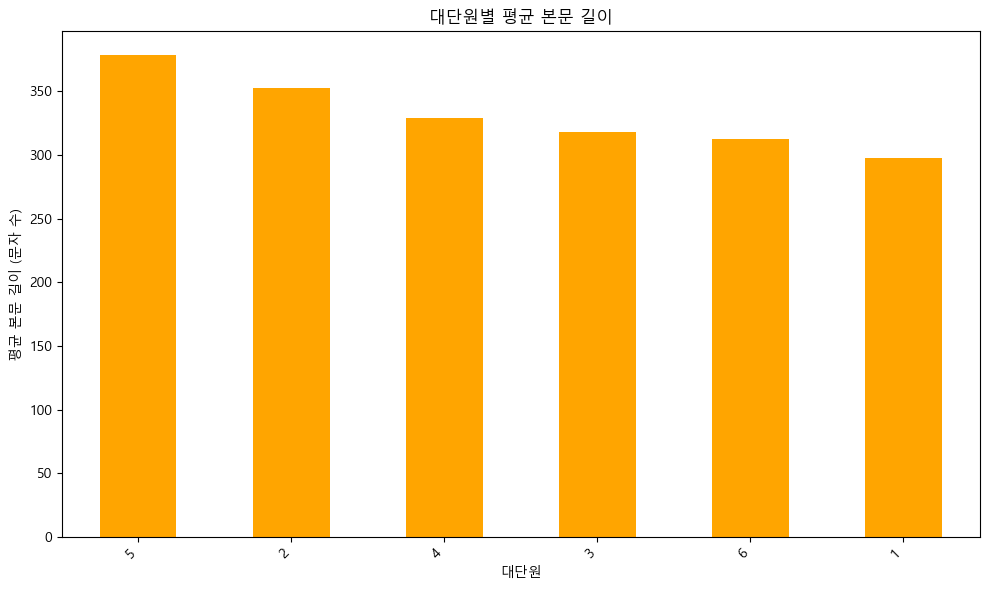

In [9]:
# 본문 길이 열 추가
df["본문길이"] = df["본문"].apply(lambda x: len(str(x)))

# 대단원별 평균 본문 길이 계산
mean_by_major = df.groupby(df["대단원"].astype(str))["본문길이"].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
mean_by_major.plot(kind='bar', color='orange')
plt.ylabel("평균 본문 길이 (문자 수)")
plt.title("대단원별 평균 본문 길이")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
# 중단원별 본문 길이 분포 분석

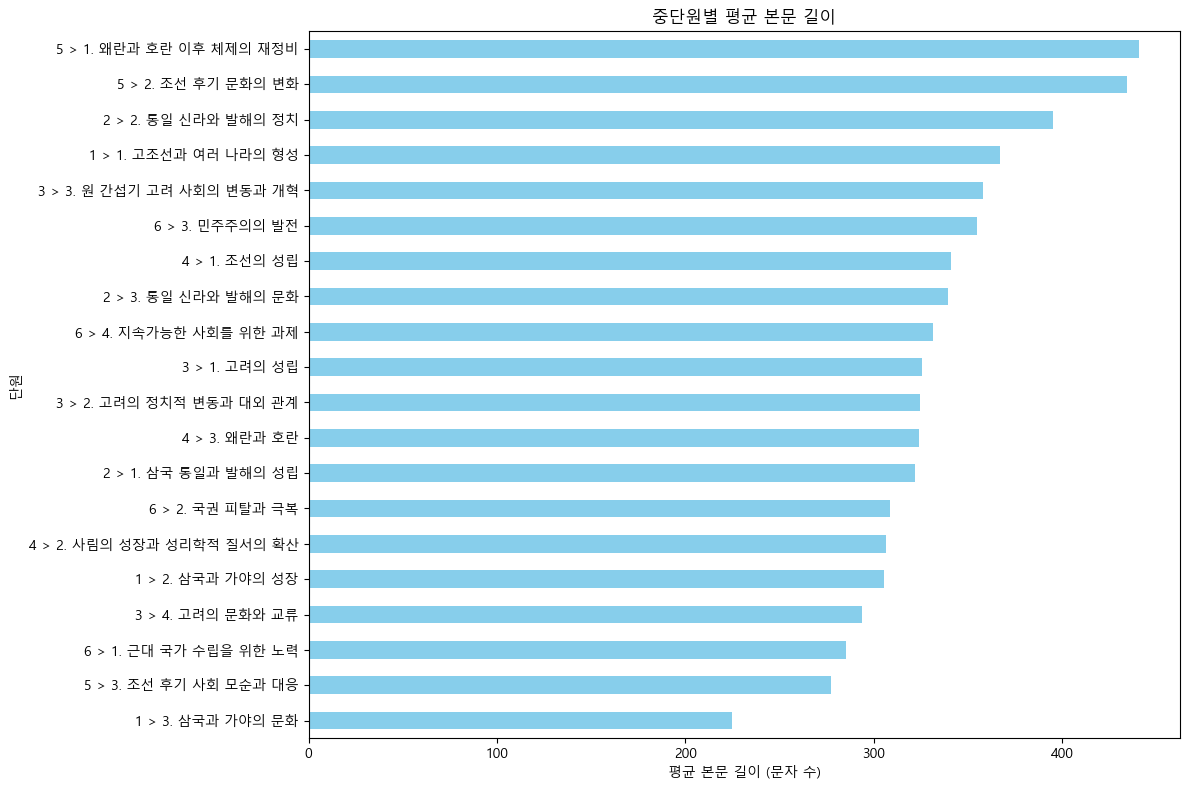

In [13]:
# 단원 구분 열 만들기
df["단원구분"] = df["대단원"].astype(str) + " > " + df["중단원"].astype(str)

# 2. 단원별 평균 본문 길이 계산
df["본문길이"] = df["본문"].apply(lambda x: len(str(x)))  # 혹시 빠졌다면 포함
mean_lengths = df.groupby("단원구분")["본문길이"].mean().sort_values(ascending=False)

# 3. 시각화
plt.figure(figsize=(12, 8))
mean_lengths.plot(kind='barh', color='skyblue')
plt.xlabel("평균 본문 길이 (문자 수)")
plt.ylabel("단원")
plt.title("중단원별 평균 본문 길이")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [15]:
# 본문 길이 분포

In [17]:
file_path = "교과서_본문.json"  # 로컬 또는 Colab 경로로 수정 필요
with open(file_path, "r", encoding="utf-8") as f:
    json = json.load(f)

df = pd.DataFrame(json)
df['content_length'] = df['content'].apply(len)

기술통계:
 count    166.000000
mean     330.096386
std      101.298014
min      134.000000
25%      254.250000
50%      321.000000
75%      401.000000
max      635.000000
Name: content_length, dtype: float64


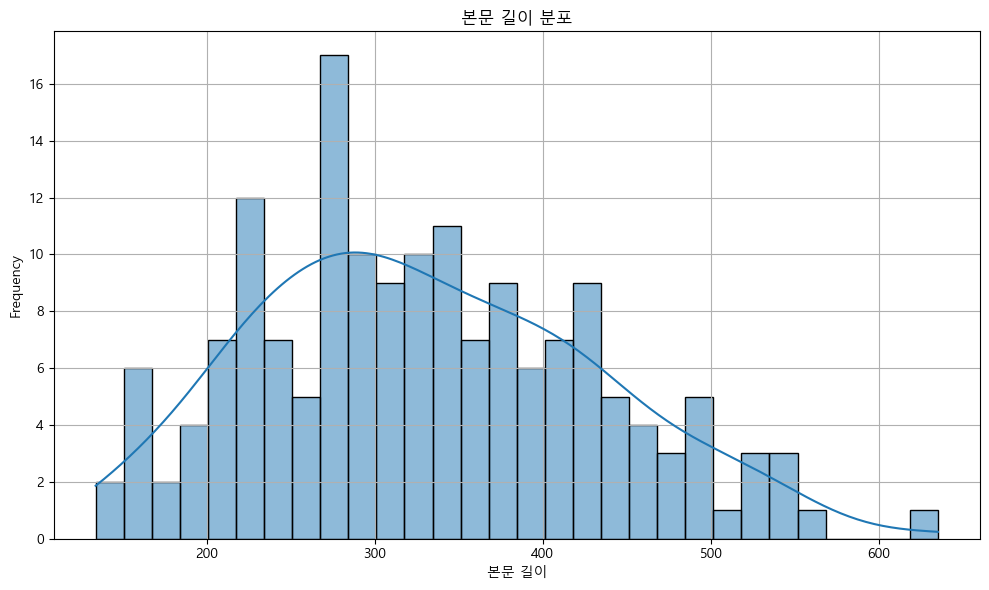

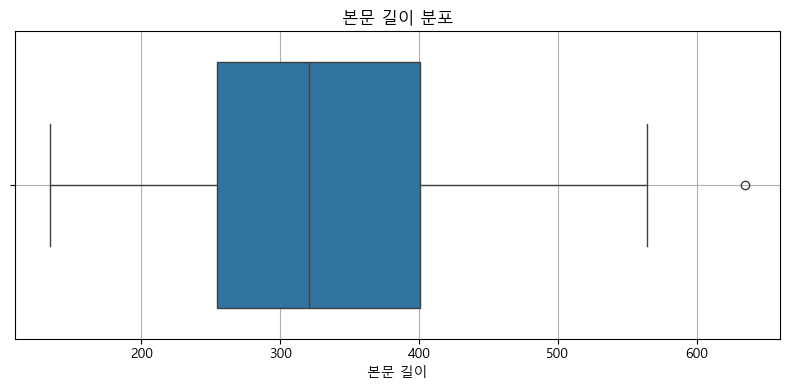

In [25]:
# 기술통계 
stats = df['content_length'].describe()
print("기술통계:\n", stats)

# 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df['content_length'], bins=30, kde=True)
plt.title("본문 길이 분포")
plt.xlabel("본문 길이")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# 박스플롯 (본문 길이 범위 시각화)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['content_length'])
plt.title("본문 길이 분포")
plt.xlabel("본문 길이")
plt.grid(True)
plt.tight_layout()
plt.show()